In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import warnings; warnings.simplefilter('ignore')
import numpy as np

In [2]:
pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

In [3]:
#построение боксплотов для номинативных параметров
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=matem.loc[matem.loc[:, column].isin(matem.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=0)
    ax.set_title('Boxplot for ' + column)
    plt.show()

In [4]:
#проверка теста Стьюдента
def get_stat_dif(column):
    cols = matem.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(matem.loc[matem.loc[:, column] == comb[0], 'score'], 
                        matem.loc[matem.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [5]:
matem = pd.read_csv('stud_math.csv')

In [6]:
matem.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


In [7]:
matem.describe()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
count,395.000000,392.000000,371.000000,367.000000,388.000000,373.000000,388.000000,368.000000,384.000000,387.000000,380.000000,383.000000,389.000000
mean,16.696203,2.750000,2.614555,1.438692,2.038660,0.337802,-6.115979,3.937500,3.231771,3.105943,3.531579,7.279373,52.262211
std,1.276043,1.098127,2.228732,0.694181,0.842078,0.743135,2.526235,0.927277,0.993940,1.115896,1.396019,23.465197,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,-3.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


In [8]:
matem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [9]:
#меняем названия колонок
matem.columns = 'school', 'sex', 'age', 'address', 'relatives', 'parents', 'mom_edu', 'dad_edu', 'mom_job', 'dad_job', 'reason', 'guardian', 'path', 'study_time', 'failures', 'add_help', 'family_help', 'add_paid', 'add_study', 'nursery', 'study_time_gran', 'univer', 'net', 'love', 'family_env', 'free_time', 'friend_time', 'health', 'skip', 'score'

In [10]:
#оценим состояние оценок
display(matem.score.unique())
display(matem.score.value_counts())

array([ 30.,  50.,  75.,  55.,  95.,  45.,  60.,  70.,  80.,  25.,  40.,
        85.,  90.,  65., 100.,  35.,   0.,  nan,  20.])

50.0     54
55.0     46
0.0      37
75.0     33
65.0     31
40.0     31
60.0     31
70.0     27
45.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
85.0      6
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64

count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

median = 55.0


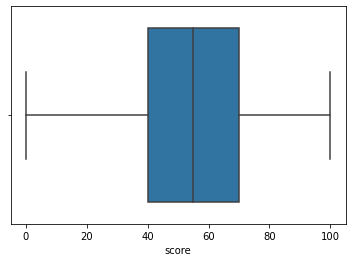

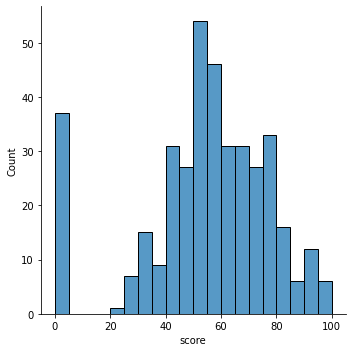

In [11]:
display(matem.score.describe())
print('median = ', matem.score.median(), sep='')
sns.boxplot(matem.score)
sns.displot(matem.score, binwidth=5)

In [12]:
#выбросов нет, разброс 0-100, размах 40-70, среднее 52,26, медиана 55, мода 50
#есть данные без оценки - удалим их сразу, так как по этому результату мы и сравниваем
#ниже оценки 20 результатов нет, с разрывом есть значение 0, думаю не целесообразно брать их в сравнительный расчет

matem = matem[(matem.score >= 20) & (matem.score <= 100)]
display(matem.score.unique())

array([ 30.,  50.,  75.,  55.,  95.,  45.,  60.,  70.,  80.,  25.,  40.,
        85.,  90.,  65., 100.,  35.,  20.])

In [13]:
display(matem.school.unique())
#good

array(['GP', 'MS'], dtype=object)

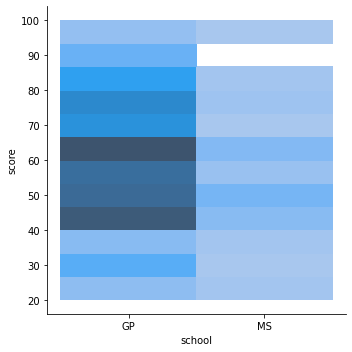

In [14]:
sns.displot(matem, x='school', y='score')

In [15]:
display(matem.sex.unique())
#good

array(['F', 'M'], dtype=object)

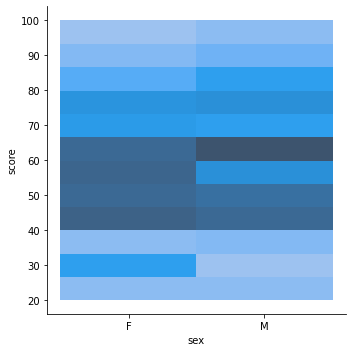

In [16]:
sns.displot(matem, x='sex', y='score')

In [17]:
display(matem.age.unique())
#good

array([18, 17, 15, 16, 19, 22, 20, 21], dtype=int64)

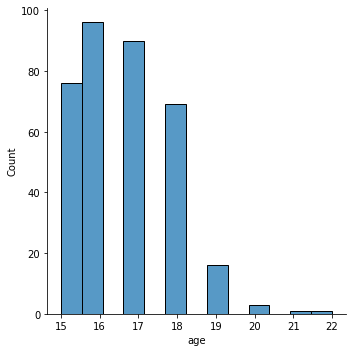

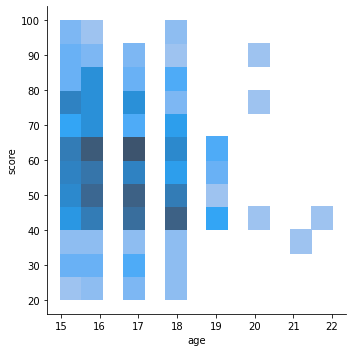

In [18]:
sns.displot(matem, x='age')
sns.displot(matem, x='age', y='score')

In [19]:
#по гистограммам могу сделать вывод, что основная масса проверяемых во всех возрастах набирает результаты близкие к средним и медианным,
#максимальные результаты в цветовой гамме также равнозначны во всех возрастах, за исключение старших классов, однако их в выборке представленно мало
#в целом можно сделать предварительный вывод, что от возраста зависимость успеваемости коррелирует мало
#ожидаемо, такие же результаты по полу и школам (возможно нужно будет взять в сравнение больше школ, так как эта корреляция выглядит логичной)

#в дальнейшем вместо None пришлось использовать 'None', так как sns не разрешает строить гистограммы

In [20]:
#address column check
display(matem.address.unique())

array(['U', nan, 'R'], dtype=object)

In [21]:
#переименуем для удобства адреса
matem.address = matem.address.apply(lambda x: 'town' if x == 'U' 
                                    else 'rural' if x == 'R'
                                    else 'None')

display(matem.address.unique())
display(matem.address.value_counts())

array(['town', 'None', 'rural'], dtype=object)

town     265
rural     73
None      14
Name: address, dtype: int64

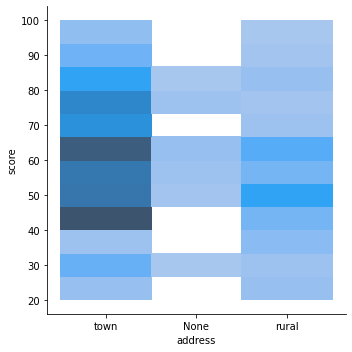

In [22]:
sns.displot(matem, x='address', y='score')

In [23]:
#relatives column check
display(matem.relatives.unique())

array([nan, 'GT3', 'LE3'], dtype=object)

In [24]:
#rename
matem.relatives = matem.relatives.apply(lambda x: 'more 3' if x == 'GT3'
                                        else 'less 3' if x == 'LE3'
                                        else 'None')

display(matem.relatives.unique())
display(matem.relatives.value_counts())

array(['None', 'more 3', 'less 3'], dtype=object)

more 3    228
less 3    100
None       24
Name: relatives, dtype: int64

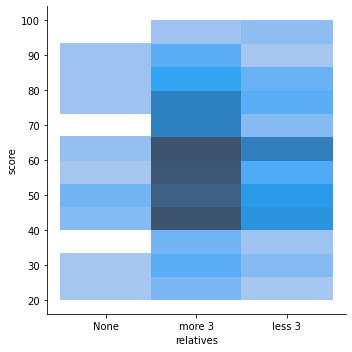

In [25]:
sns.displot(matem, x='relatives', y='score')

In [26]:
#parents relationships column check
display(matem.parents.unique())

array(['A', nan, 'T'], dtype=object)

In [27]:
#rename
matem.parents = matem.parents.apply(lambda x: 'together' if x == 'T'
                                        else 'separatly' if x == 'A'
                                        else 'None')

display(matem.parents.unique())
display(matem.parents.value_counts())

array(['separatly', 'None', 'together'], dtype=object)

together     277
None          41
separatly     34
Name: parents, dtype: int64

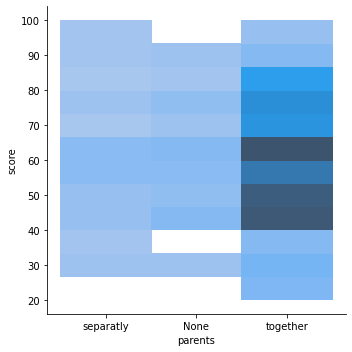

In [28]:
sns.displot(matem, x='parents', y='score')

In [29]:
#mom education column check
display(matem.mom_edu.unique())

array([ 4.,  1.,  3.,  2., nan,  0.])

In [30]:
#rename
matem.mom_edu = matem.mom_edu.apply(lambda x: str('without') if x == 0
                                    else str('junior') if x == 1
                                    else str('medium') if x == 2
                                    else str('senior') if x == 3
                                    else str('bachelor') if x == 4
                                    else 'None')

display(matem.mom_edu.unique())
display(matem.mom_edu.value_counts())

array(['bachelor', 'junior', 'senior', 'medium', 'None', 'without'],
      dtype=object)

bachelor    125
medium       88
senior       87
junior       47
without       3
None          2
Name: mom_edu, dtype: int64

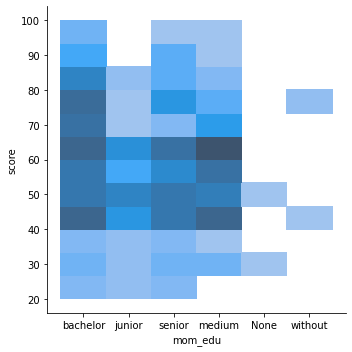

In [31]:
sns.displot(matem, x='mom_edu', y='score')

In [32]:
#dad education column check
display(matem.dad_edu.unique())

array([ 4.,  1.,  2.,  3., 40., nan,  0.])

In [33]:
#40 - ошибка ввода, поменяем на ответ 4
#rename
matem.dad_edu = matem.dad_edu.apply(lambda x: str('without') if x == 0
                                    else str('junior') if x == 1
                                    else str('medium') if x == 2
                                    else str('senior') if x == 3
                                    else str('bachelor') if x == 4
                                    else str('bachelor') if x == 40
                                    else 'None')

display(matem.dad_edu.unique())
display(matem.dad_edu.value_counts())

array(['bachelor', 'junior', 'medium', 'senior', 'None', 'without'],
      dtype=object)

medium      94
senior      89
bachelor    81
junior      65
None        21
without      2
Name: dad_edu, dtype: int64

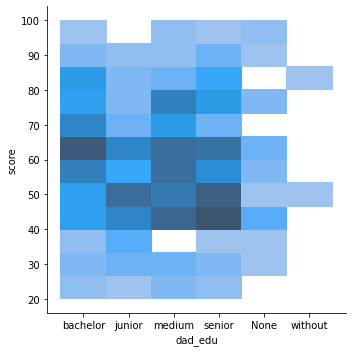

In [34]:
sns.displot(matem, x='dad_edu', y='score')

In [35]:
#mom job column check
display(matem.mom_job.unique())

array(['at_home', 'health', 'other', 'services', 'teacher', nan],
      dtype=object)

In [36]:
#rename
matem.mom_job = matem.mom_job.apply(lambda x: x if type(x) == str
                                    else 'None')

display(matem.mom_job.unique())
display(matem.mom_job.value_counts())

array(['at_home', 'health', 'other', 'services', 'teacher', 'None'],
      dtype=object)

other       115
services     90
teacher      51
at_home      49
health       30
None         17
Name: mom_job, dtype: int64

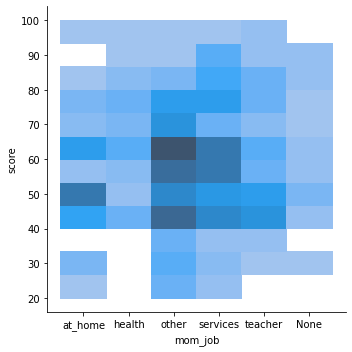

In [37]:
sns.displot(matem, x='mom_job', y='score')

In [38]:
#dad job column check
display(matem.dad_job.unique())

array(['teacher', 'other', nan, 'health', 'services', 'at_home'],
      dtype=object)

In [39]:
#rename
matem.dad_job = matem.dad_job.apply(lambda x: x if type(x) == str
                                    else 'None')

display(matem.dad_job.unique())
display(matem.dad_job.value_counts())

array(['teacher', 'other', 'None', 'health', 'services', 'at_home'],
      dtype=object)

other       176
services     89
None         32
teacher      26
health       15
at_home      14
Name: dad_job, dtype: int64

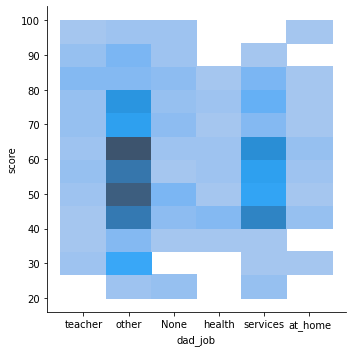

In [40]:
sns.displot(matem, x='dad_job', y='score')

In [41]:
#предварительные выводы: по адресам и совместному проживанию родителей, судя по гистограммам, корреляции не наблюдается
#незначительно отличается график относительно количества родственников в семье, в пользу меньшего количества (наверное отвлекают от учебы))))
#в образовании отмечается незначительная тенденция к лучшей успеваемости в семьях со средним и высшим образованием
#по работе родителей распределение более менее равномерное (у отцов врачей дети не получают наивысших баллов по математике... печально лично для меня))))

In [42]:
#reason column check
display(matem.reason.unique())

array(['course', 'other', 'home', 'reputation', nan], dtype=object)

In [43]:
#rename
matem.reason = matem.reason.apply(lambda x: x if type(x) == str
                                    else 'None')

display(matem.reason.unique())
display(matem.reason.value_counts())

array(['course', 'other', 'home', 'reputation', 'None'], dtype=object)

course        119
reputation     96
home           89
other          33
None           15
Name: reason, dtype: int64

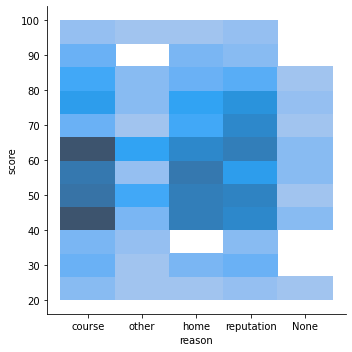

In [44]:
sns.displot(matem, x='reason', y='score')
#никаких особенностей

In [45]:
#guardian column check
display(matem.guardian.unique())

array(['mother', 'father', 'other', nan], dtype=object)

In [46]:
#rename
matem.guardian = matem.guardian.apply(lambda x: x if type(x) == str
                                    else 'None')

display(matem.guardian.unique())
display(matem.guardian.value_counts())

array(['mother', 'father', 'other', 'None'], dtype=object)

mother    225
father     78
None       29
other      20
Name: guardian, dtype: int64

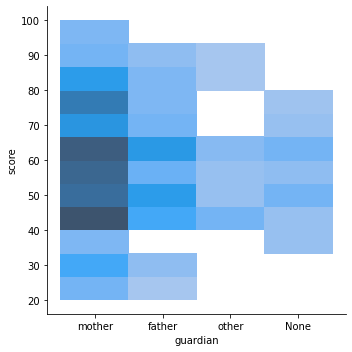

In [47]:
sns.displot(matem, x='guardian', y='score')
#при опекунстве мамы результаты лучше, хотя при варианте с другим опекуном нет низких оценок, но случаев в выборке значительно меньше

In [48]:
#addition help column check
display(matem.add_help.unique())

array(['yes', 'no', nan], dtype=object)

In [49]:
#rename
matem.add_help = matem.add_help.apply(lambda x: x if type(x) == str
                                    else 'None')

display(matem.add_help.unique())
display(matem.add_help.value_counts())

array(['yes', 'no', 'None'], dtype=object)

no      295
yes      48
None      9
Name: add_help, dtype: int64

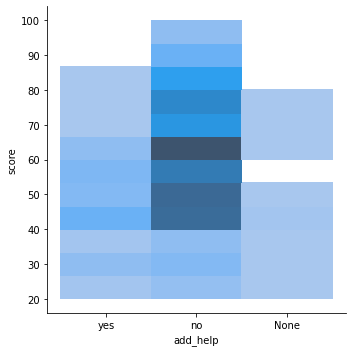

In [50]:
sns.displot(matem, x='add_help', y='score')
#распределение равномерно, значения по количеству сильно разняться чтобы сделать однозначные выводы, доп образовательная поддержка по идее должна оказывать положительное влияние

In [51]:
#family help column check
display(matem.family_help.unique())

array(['no', 'yes', nan], dtype=object)

In [52]:
#rename
matem.family_help = matem.family_help.apply(lambda x: x if type(x) == str
                                    else 'None')

display(matem.family_help.unique())
display(matem.family_help.value_counts())

array(['no', 'yes', 'None'], dtype=object)

yes     196
no      120
None     36
Name: family_help, dtype: int64

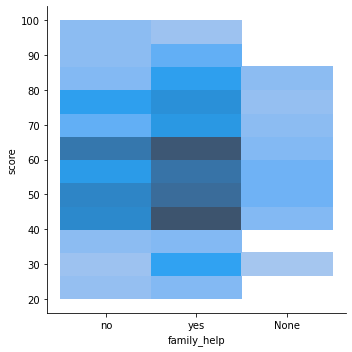

In [53]:
sns.displot(matem, x='family_help', y='score')
#никаких особенностей

In [54]:
#платные занятия по математике
display(matem.add_paid.unique())

array(['no', nan, 'yes'], dtype=object)

In [55]:
#rename
matem.add_paid = matem.add_paid.apply(lambda x: x if type(x) == str
                                    else 'None')

display(matem.add_paid.unique())
display(matem.add_paid.value_counts())

array(['no', 'None', 'yes'], dtype=object)

no      170
yes     146
None     36
Name: add_paid, dtype: int64

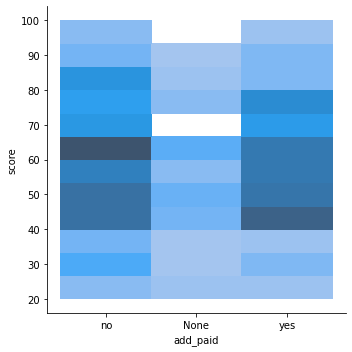

In [56]:
sns.displot(matem, x='add_paid', y='score')
#никаких особенностей

In [57]:
#доп внеучебные занятия
display(matem.add_study.unique())

array(['no', 'yes', nan], dtype=object)

In [58]:
#rename
matem.add_study = matem.add_study.apply(lambda x: x if type(x) == str
                                    else 'None')

display(matem.add_study.unique())
display(matem.add_study.value_counts())

array(['no', 'yes', 'None'], dtype=object)

yes     172
no      168
None     12
Name: add_study, dtype: int64

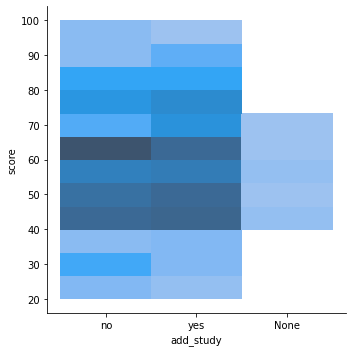

In [59]:
sns.displot(matem, x='add_study', y='score')
#никаких особенностей

In [60]:
#проверяем анамнез по детскому садику
display(matem.nursery.unique())

array(['yes', 'no', nan], dtype=object)

In [61]:
#rename
matem.nursery = matem.nursery.apply(lambda x: x if type(x) == str
                                    else 'None')

display(matem.nursery.unique())
display(matem.nursery.value_counts())

array(['yes', 'no', 'None'], dtype=object)

yes     272
no       68
None     12
Name: nursery, dtype: int64

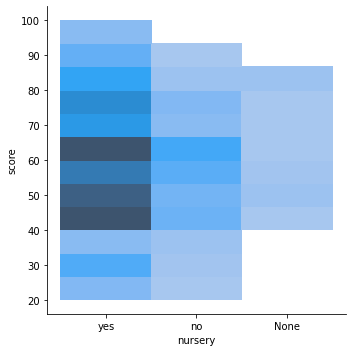

In [62]:
sns.displot(matem, x='nursery', y='score')
#никаких особенностей, наивысшие баллы встречаются у детей которые посещали садик, однако выборка по ним в 4 раза больше

In [63]:
#проверяем желание поступить на высшее
display(matem.univer.unique())

array(['yes', nan, 'no'], dtype=object)

In [64]:
#rename
matem.univer = matem.univer.apply(lambda x: x if type(x) == str
                                    else 'None')

display(matem.univer.unique())
display(matem.univer.value_counts())

array(['yes', 'None', 'no'], dtype=object)

yes     320
None     19
no       13
Name: univer, dtype: int64

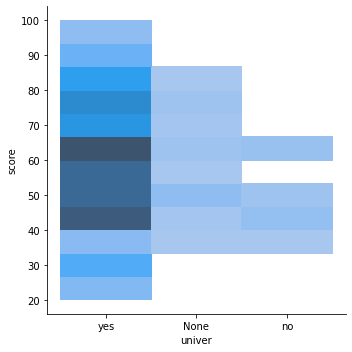

In [65]:
sns.displot(matem, x='univer', y='score')
#очень сложно сравнивать значения в 30 раз, из тез кто хочет поступать в будущем оценки распределяются равномерно (возможно они хотят пойти не на точные науки)

In [66]:
#проверяем наличие дома интернета
display(matem.net.unique())

array([nan, 'yes', 'no'], dtype=object)

In [67]:
#rename
matem.net = matem.net.apply(lambda x: x if type(x) == str
                                    else 'None')

display(matem.net.unique())
display(matem.net.value_counts())

array(['None', 'yes', 'no'], dtype=object)

yes     274
no       49
None     29
Name: net, dtype: int64

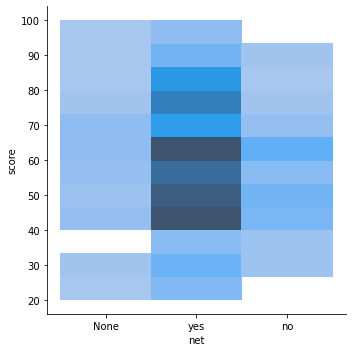

In [68]:
sns.displot(matem, x='net', y='score')
#нет особенностей

In [69]:
#проверяем наличие романтических отношений
display(matem.love.unique())

array(['no', nan, 'yes'], dtype=object)

In [70]:
#rename
matem.love = matem.love.apply(lambda x: x if type(x) == str
                                    else 'None')

display(matem.love.unique())
display(matem.love.value_counts())

array(['no', 'None', 'yes'], dtype=object)

no      219
yes     104
None     29
Name: love, dtype: int64

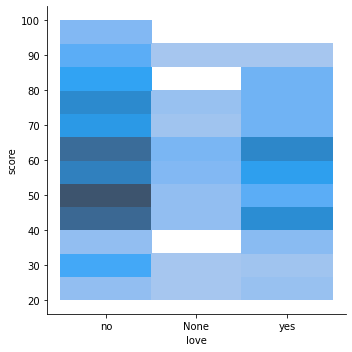

In [71]:
sns.displot(matem, x='love', y='score')
#нет особенностей, более высокие результаты у одиноких

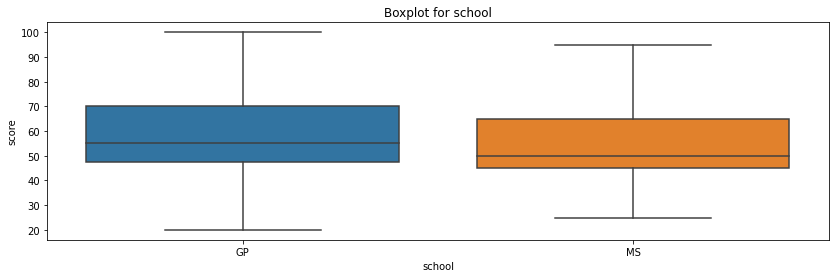

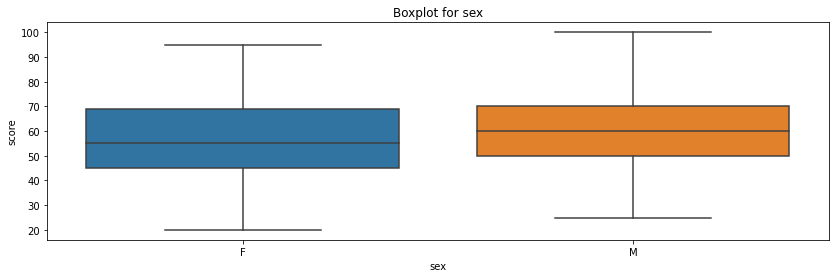

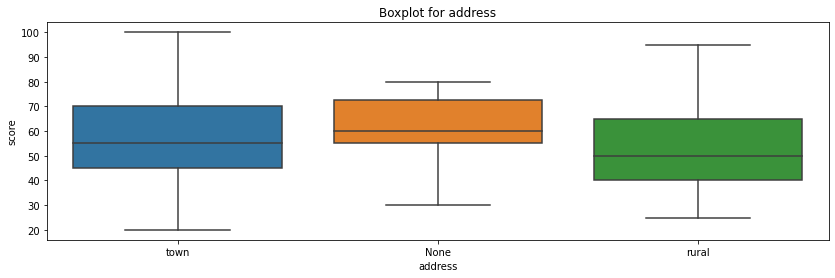

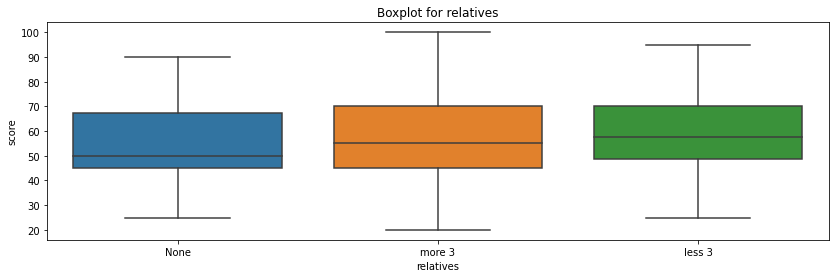

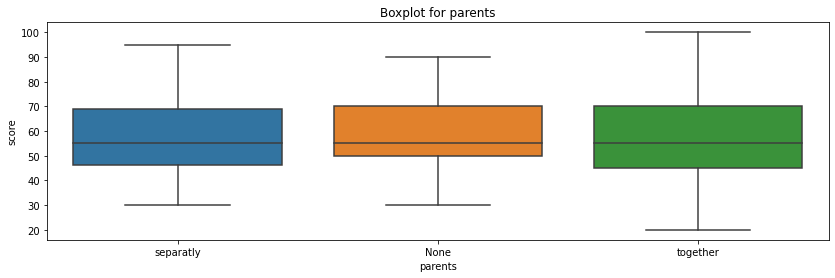

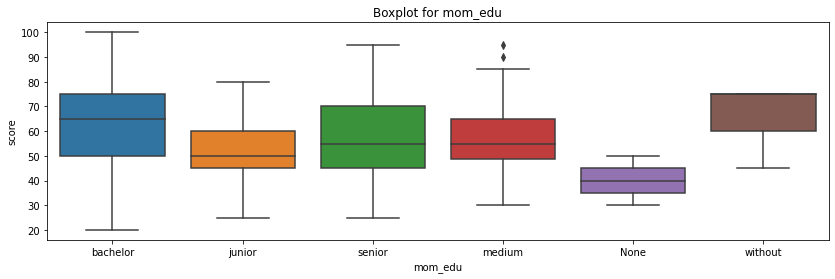

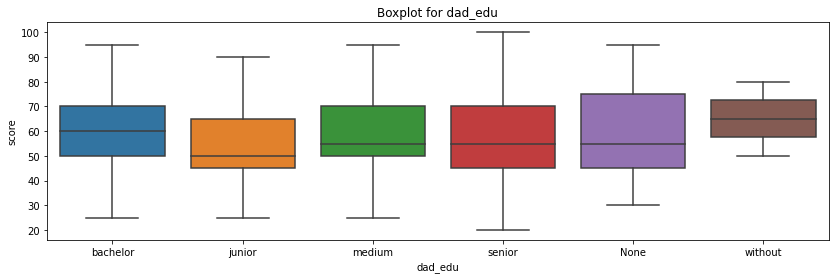

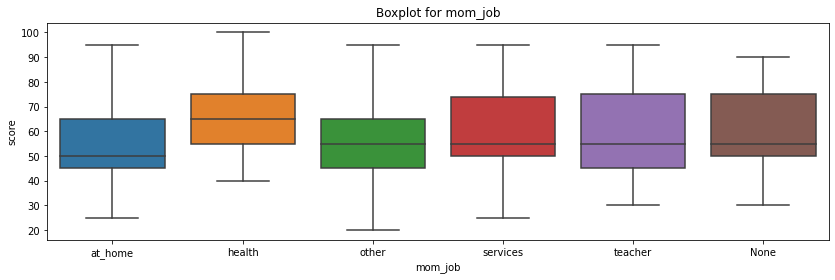

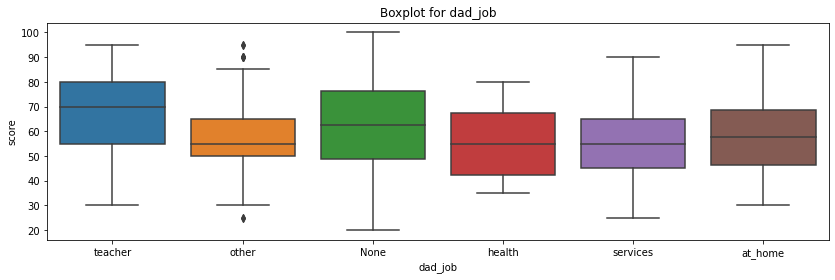

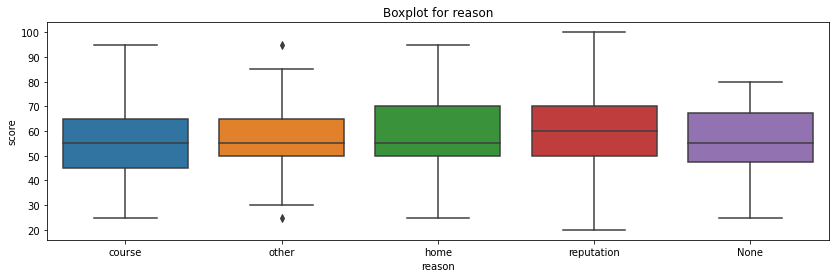

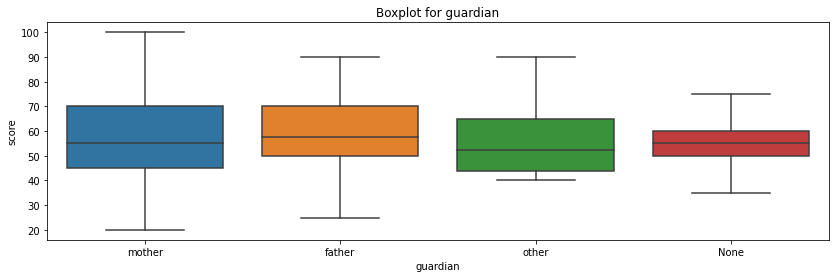

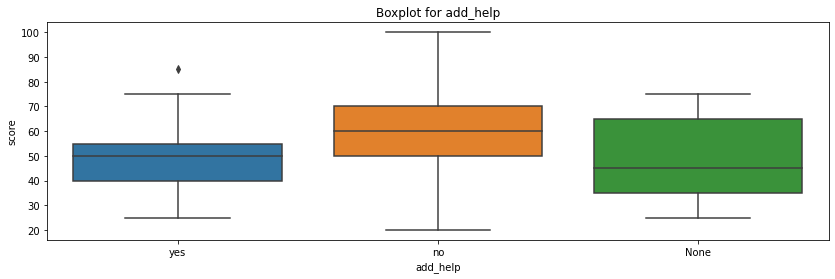

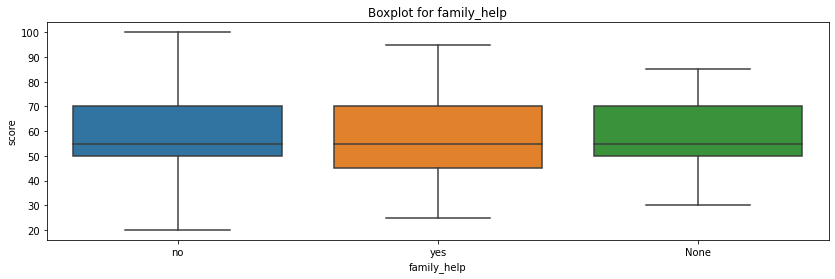

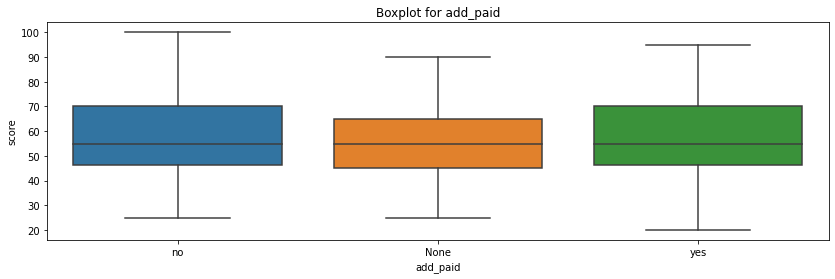

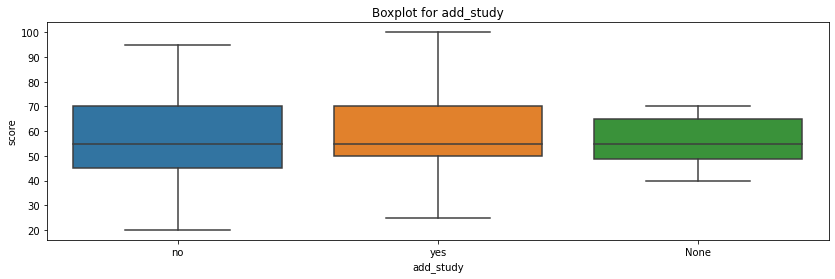

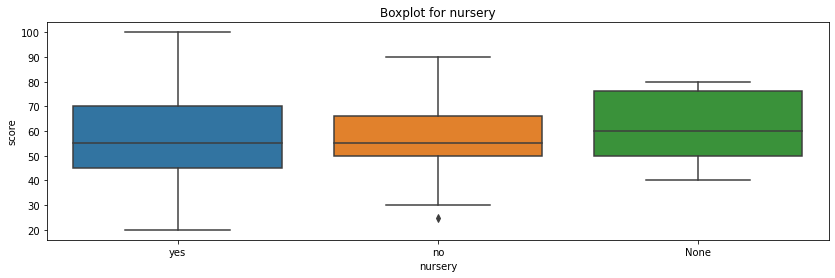

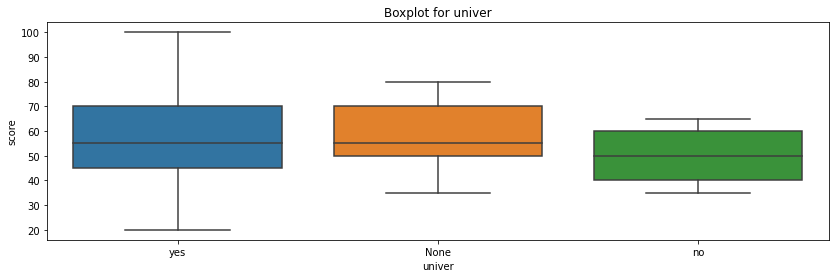

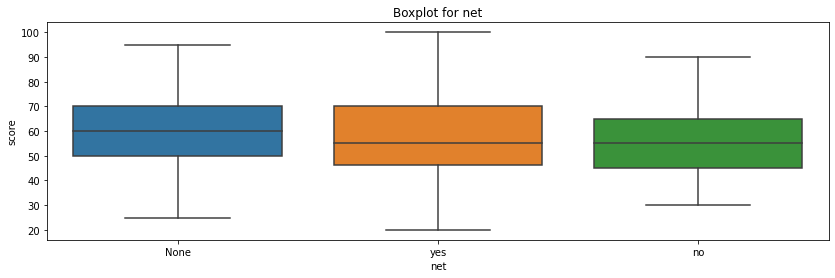

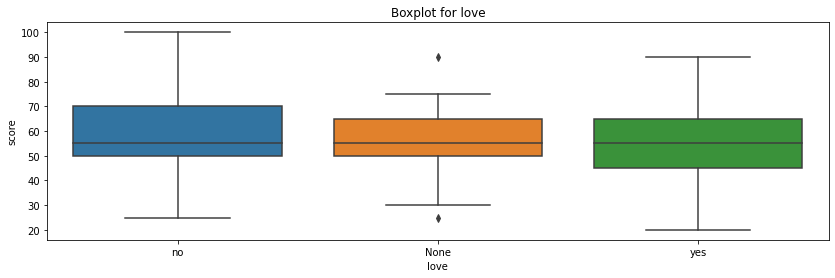

In [72]:
#для номинативных значений строим боксплоты
for col in ['school', 'sex', 'address', 'relatives', 'parents', 'mom_edu', 'dad_edu', 'mom_job', 'dad_job', 'reason', 'guardian', 'add_help', 'family_help', 'add_paid', 'add_study', 'nursery', 'univer', 'net', 'love']:
    get_boxplot(col)

In [73]:
#согласно боксплотам, видимые результаты наблюдаются в зависисмости от: 
#школы, проживания в городе, работы отца учителем, опекуна родителя, без доп образовательной помощи???? (учителя в этих школах мешают что ли), и у тех кто ни с кем не встречается в школе а только учится

In [74]:
#проверяем по тесту Стьюдента
for col in ['school', 'sex', 'address', 'relatives', 'parents', 'mom_edu', 'dad_edu', 'mom_job', 'dad_job', 'reason', 'guardian', 'add_help', 'family_help', 'add_paid', 'add_study', 'nursery', 'univer', 'net', 'love']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки mom_edu
Найдены статистически значимые различия для колонки dad_edu
Найдены статистически значимые различия для колонки mom_job
Найдены статистически значимые различия для колонки dad_job
Найдены статистически значимые различия для колонки add_help


In [75]:
#ну что же, вот и определенные мысли...

In [76]:
#продолжаю проверку по числовым данным

In [77]:
#path column check
display(matem.path.unique())

array([ 2.,  1.,  3., nan,  4.])

In [78]:
#study_time column check
display(matem.study_time.unique())
display(matem.study_time.value_counts())

#study_time_gran column check
display(matem.study_time_gran.unique())
display(matem.study_time_gran.value_counts())

#идентичные результаты

array([ 2.,  3.,  1., nan,  4.])

2.0    173
1.0     90
3.0     58
4.0     24
Name: study_time, dtype: int64

array([ -6.,  -9.,  -3.,  nan, -12.])

-6.0     173
-3.0      90
-9.0      58
-12.0     24
Name: study_time_gran, dtype: int64

In [79]:
#failures column check
display(matem.failures.unique())

array([ 0.,  3., nan,  2.,  1.])

In [80]:
#проверяем семейные отношения
display(matem.family_env.unique())

array([ 4.,  5.,  3., nan, -1.,  2.,  1.])

In [81]:
matem.family_env = matem.family_env.apply(lambda x: 1 if x == -1
                                          else x)

display(matem.family_env.unique())
display(matem.family_env.value_counts())

array([ 4.,  5.,  3., nan,  1.,  2.])

4.0    163
5.0     88
3.0     56
2.0     14
1.0      7
Name: family_env, dtype: int64

In [82]:
#free_time column check
display(matem.free_time.unique())

array([ 3.,  2.,  4.,  1.,  5., nan])

In [83]:
#friend_time column check
display(matem.friend_time.unique())

array([ 4.,  3.,  2.,  1.,  5., nan])

In [84]:
#проверка по текущему здоровью
display(matem.health.unique())

array([ 3.,  5.,  1.,  2.,  4., nan])

array([  6.,   4.,  10.,   2.,   0.,  16.,  nan,  14.,   7.,   8.,  25.,
        12.,  54.,  18.,  26.,  20.,  56.,  24.,  28.,   5.,  13.,  15.,
        22.,   3., 385.,  21.,   1.,  75.,  30.,  19.,   9.,  11.,  38.,
        40.,  23.,  17., 212.])

0.0      74
2.0      60
4.0      52
6.0      30
8.0      20
10.0     17
12.0     12
14.0     12
3.0       7
16.0      7
7.0       6
5.0       5
18.0      5
20.0      4
22.0      3
9.0       3
1.0       3
15.0      2
13.0      2
11.0      2
25.0      1
54.0      1
385.0     1
26.0      1
56.0      1
24.0      1
212.0     1
21.0      1
75.0      1
30.0      1
19.0      1
38.0      1
40.0      1
23.0      1
17.0      1
28.0      1
Name: skip, dtype: int64

<AxesSubplot:>

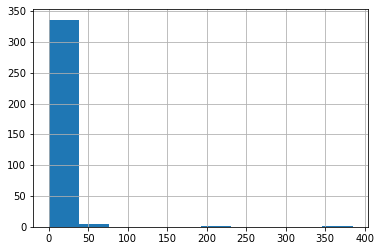

In [85]:
#проверка по количеству пропусков занятий
display(matem.skip.unique())
display(matem.skip.value_counts())
matem.skip.hist()
#уберем все значения c более 30 пропусками (все представлены по одному ученику с большим количеством пропусков плюс 2 явных выброса со значением 212 и 385)

In [86]:
matem.skip = matem.skip.apply(lambda x: x if x < 30
                              else None)
display(matem.skip.value_counts())

0.0     74
2.0     60
4.0     52
6.0     30
8.0     20
10.0    17
14.0    12
12.0    12
16.0     7
3.0      7
7.0      6
18.0     5
5.0      5
20.0     4
22.0     3
1.0      3
9.0      3
13.0     2
15.0     2
11.0     2
23.0     1
26.0     1
24.0     1
28.0     1
25.0     1
21.0     1
19.0     1
17.0     1
Name: skip, dtype: int64

In [87]:
#проверяем корреляцию по числовым значениям
matem.corr()

,age,path,study_time,failures,study_time_gran,family_env,free_time,friend_time,health,skip,score
age,1.000000,0.095370,-0.011426,0.235875,0.011426,0.072918,0.004837,0.123638,-0.056173,0.205553,-0.131542
path,0.095370,1.000000,-0.101490,0.091757,0.101490,-0.029299,-0.023067,0.029374,-0.000092,-0.021289,-0.075516
study_time,-0.011426,-0.101490,1.000000,-0.156406,-1.000000,0.057143,-0.128661,-0.029686,-0.085469,-0.093016,0.142055
failures,0.235875,0.091757,-0.156406,1.000000,0.156406,0.006870,0.127391,0.126770,0.064083,0.197509,-0.289377
study_time_gran,0.011426,0.101490,-1.000000,0.156406,1.000000,-0.057143,0.128661,0.029686,0.085469,0.093016,-0.142055
family_env,0.072918,-0.029299,0.057143,0.006870,-0.057143,1.000000,0.158597,0.045341,0.107055,-0.120223,0.040590
free_time,0.004837,-0.023067,-0.128661,0.127391,0.128661,0.158597,1.000000,0.296392,0.072729,0.020022,-0.012457
friend_time,0.123638,0.029374,-0.029686,0.126770,0.029686,0.045341,0.296392,1.000000,-0.010343,0.132160,-0.182286
health,-0.056173,-0.000092,-0.085469,0.064083,0.085469,0.107055,0.072729,-0.010343,1.000000,-0.054589,-0.075340
skip,0.205553,-0.021289,-0.093016,0.197509,0.093016,-0.120223,0.020022,0.132160,-0.054589,1.000000,-0.218907


In [ ]:
#близких значений нет, положительные тенденции имеют время затраченное на обучение помимо школы и микроклимат в семье

<AxesSubplot:>

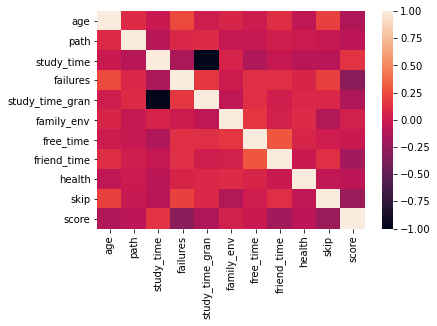

In [88]:
#строим тепловую карту
sns.heatmap(matem.corr())

In [ ]:
#сдесь более темным отмечены внеучебные неудачи и количество пропусков

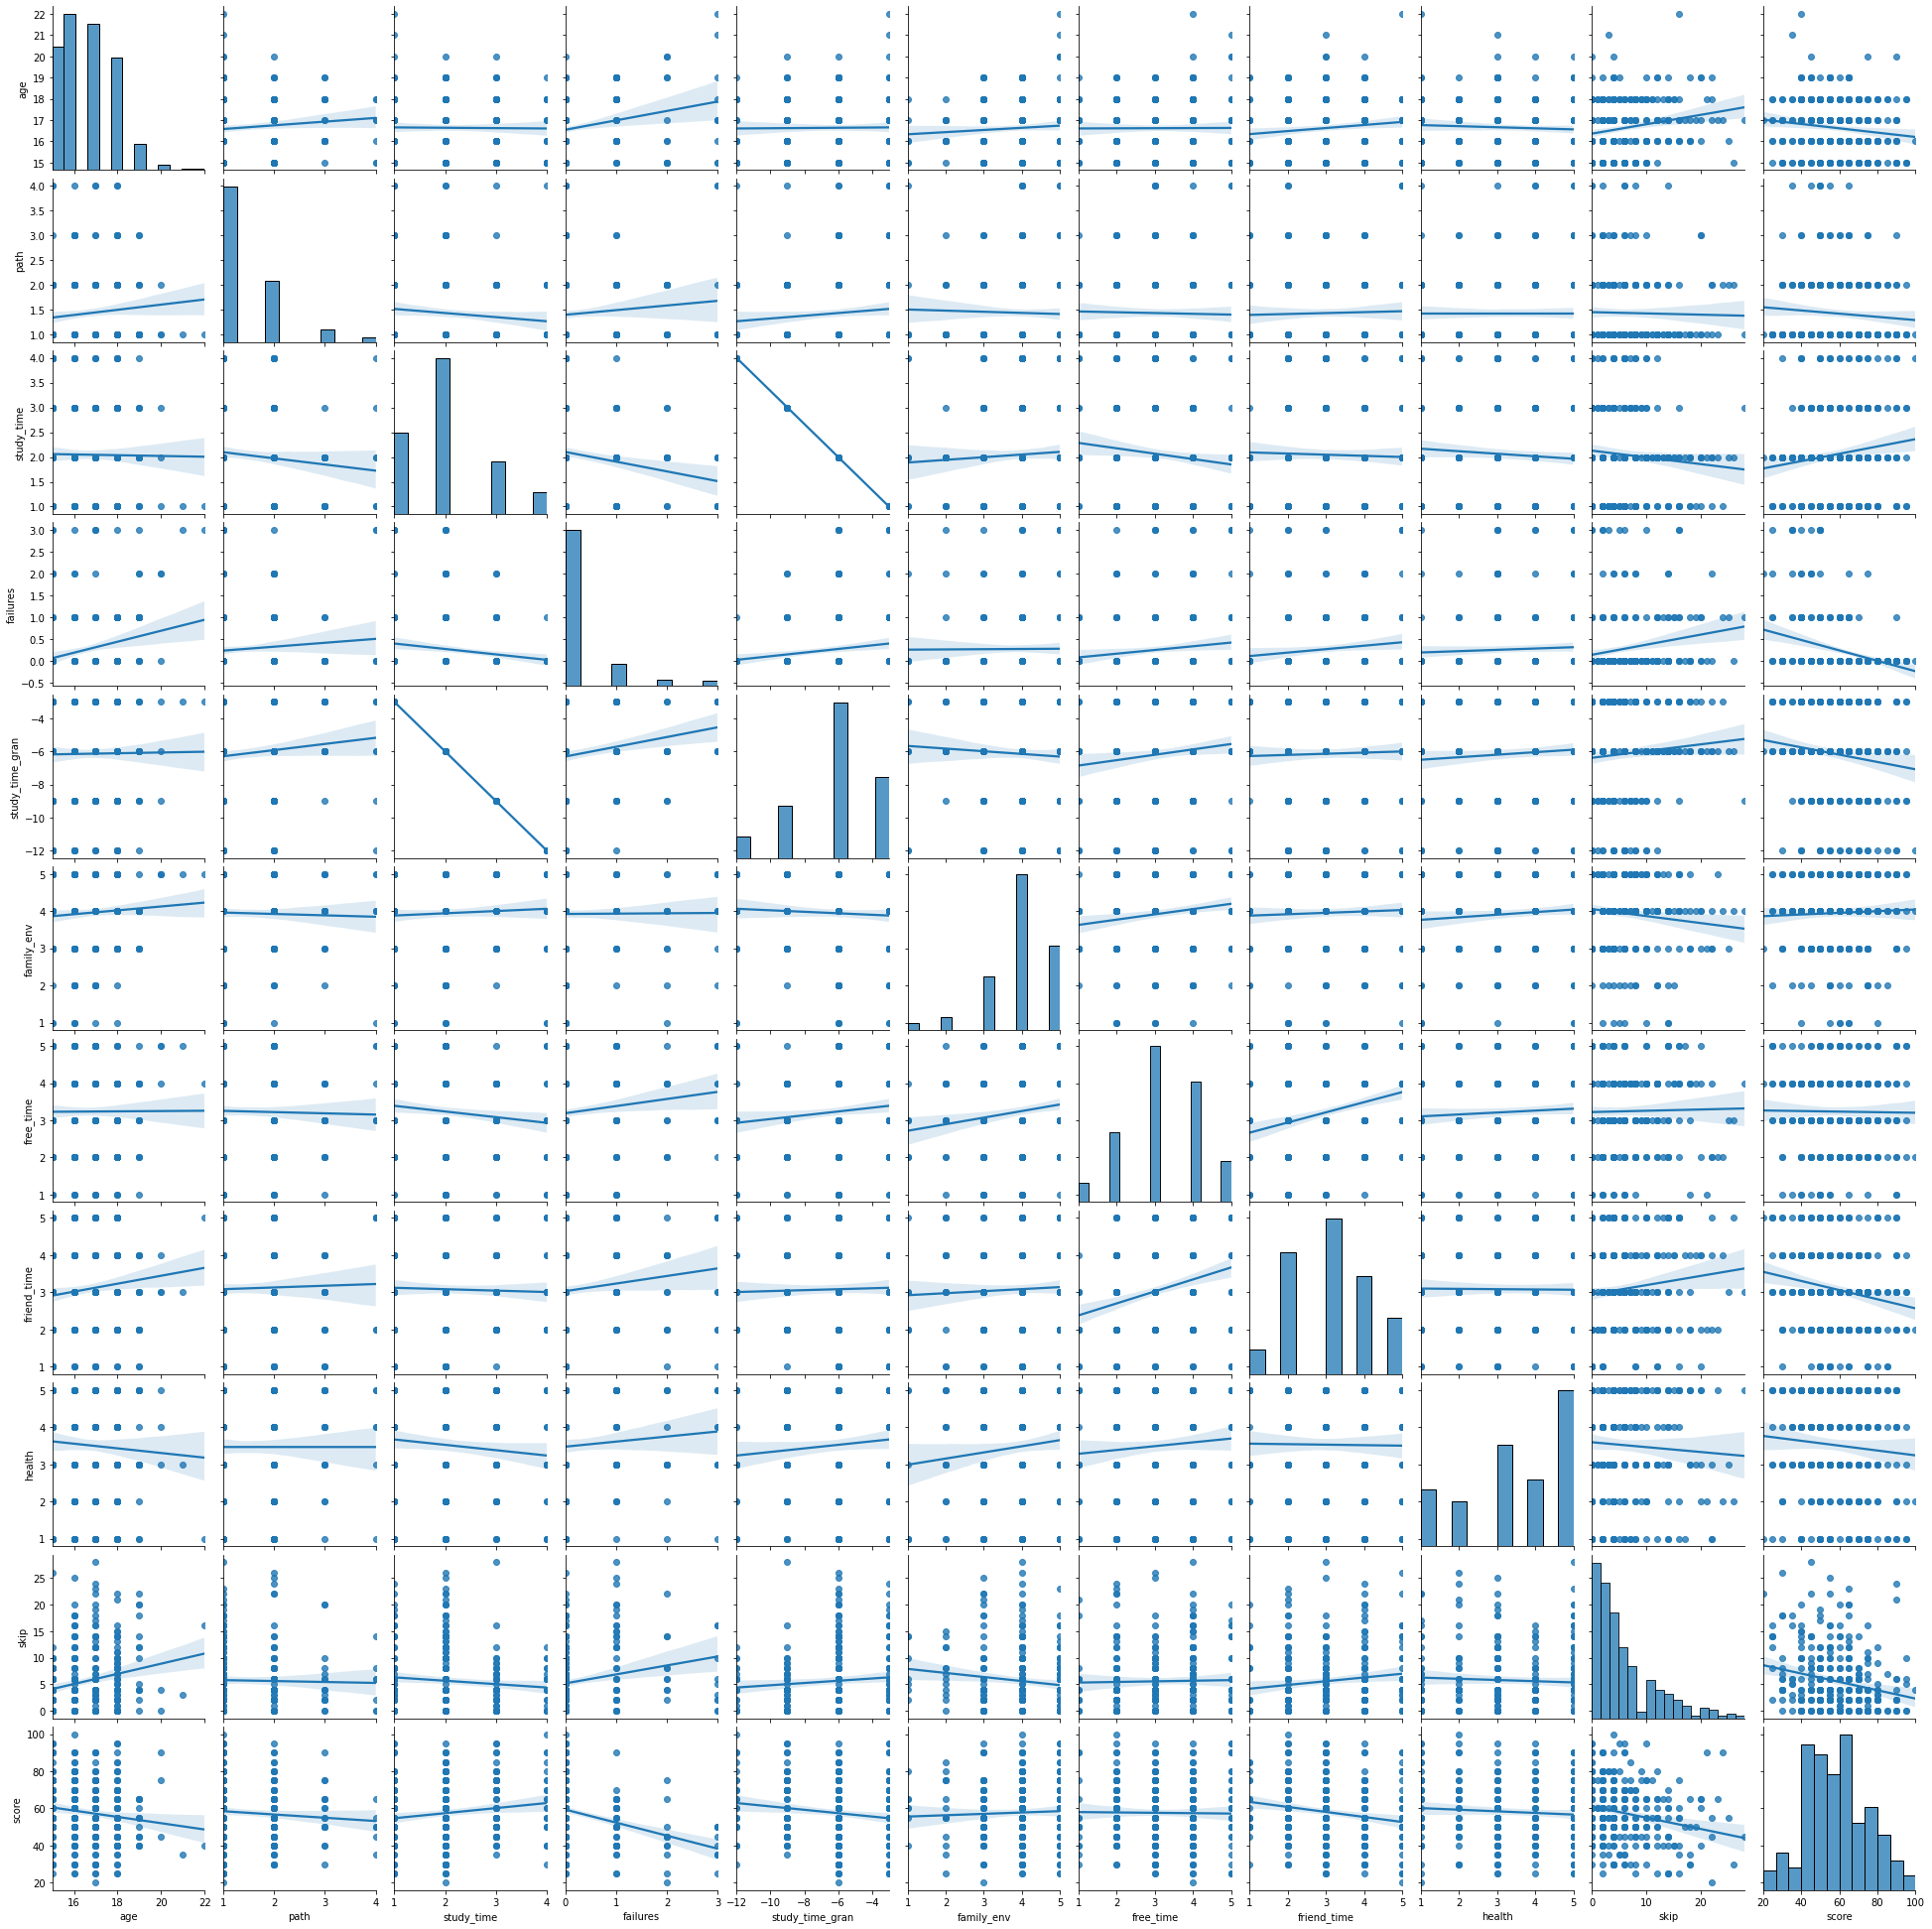

In [89]:
#строим общие графики
sns.pairplot(matem, kind = 'reg')

In [ ]:
#здесь данные говорят все таки за положительную тенденцию внеучебных занятий

In [ ]:
#ИТОГОВЫЕ ВЫВОДЫ
#по нечисловым данным, результаты по математике зависимы от образования и работы родителей, будут лучше, если ты проживаешь в городе, и желательно не получаете доп образовательной помощи от этих школ)))
#согласно числовым - сильной корреляции нет, однако положительная тенденция намечается при увеличении внеучебных занятий и улучшении микроклимата в семье
#надо отметить что результаты довольно неоднородные по количеству данных в каждой характеристике, некоторые величины отличны в десятки раз (что отмечалось мной выше), представленно только 2 школы
#нужно продолжать сбор информации из других регионов, школ, увеличить количество проверяемых детей, поменять некоторые критерии опроса (например микроклимат в семье оценить объективно сложно и тд)